In [94]:
import pandas as pd

data_test = pd.read_csv('dataset/군집용_dataset_test.csv')
data_train = pd.read_csv('dataset/군집용_dataset_train.csv')

In [50]:
cust = pd.read_csv('지역_시간/dataframe/cust_demo_plus.csv')
cust.head(1)

,cust_no,region_code,region,region_plus,gender,age_cat,online_B,online_C,mobile_A,mobile_B,mobile_C,mobile_D,하이마트,다둥이,롭스,더영
0,1,60.0,서울특별시,동남권,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [96]:
X = data_test.loc[data_test['label'] == 1 ]
X1 = X.drop(['label','cust_no'],axis=1).fillna(0)


In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(X1)

X['cluster'] = kmeans.labels_


In [95]:
data_test = pd.merge(data_test, cust[['cust_no','gender','age_cat']],on='cust_no',how='left')

In [98]:
total_dataset = pd.merge(data_test, X[['cust_no','cluster']],on='cust_no',how='left')
total_dataset['cluster'].fillna(3, inplace=True)

In [62]:
total_dataset.cluster.value_counts()

3.0    11055
0.0     3722
1.0     2856
2.0     1705
Name: cluster, dtype: int64

[Text(1674.0, 2935.44, 'freq_A_1 <= 105.5\ngini = 0.311\nsamples = 15470\nvalue = [2984, 12486]'),
 Text(837.0, 2283.12, 'freq_A_1 <= 74.5\ngini = 0.095\nsamples = 11026\nvalue = [550, 10476]'),
 Text(418.5, 1630.8000000000002, 'total_freq_3 <= 48.5\ngini = 0.04\nsamples = 9523\nvalue = [196, 9327]'),
 Text(209.25, 978.48, 'freq_B_2_1 <= 20.5\ngini = 0.479\nsamples = 300\nvalue = [119, 181]'),
 Text(104.625, 326.1600000000003, 'gini = 0.499\nsamples = 246\nvalue = [117, 129]'),
 Text(313.875, 326.1600000000003, 'gini = 0.071\nsamples = 54\nvalue = [2, 52]'),
 Text(627.75, 978.48, 'A_weight <= -4.25\ngini = 0.017\nsamples = 9223\nvalue = [77, 9146]'),
 Text(523.125, 326.1600000000003, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(732.375, 326.1600000000003, 'gini = 0.014\nsamples = 9206\nvalue = [67, 9139]'),
 Text(1255.5, 1630.8000000000002, 'total_level_weight <= -6.9\ngini = 0.36\nsamples = 1503\nvalue = [354, 1149]'),
 Text(1046.25, 978.48, 'freq_B_2 <= 47.5\ngini = 0.435\ns

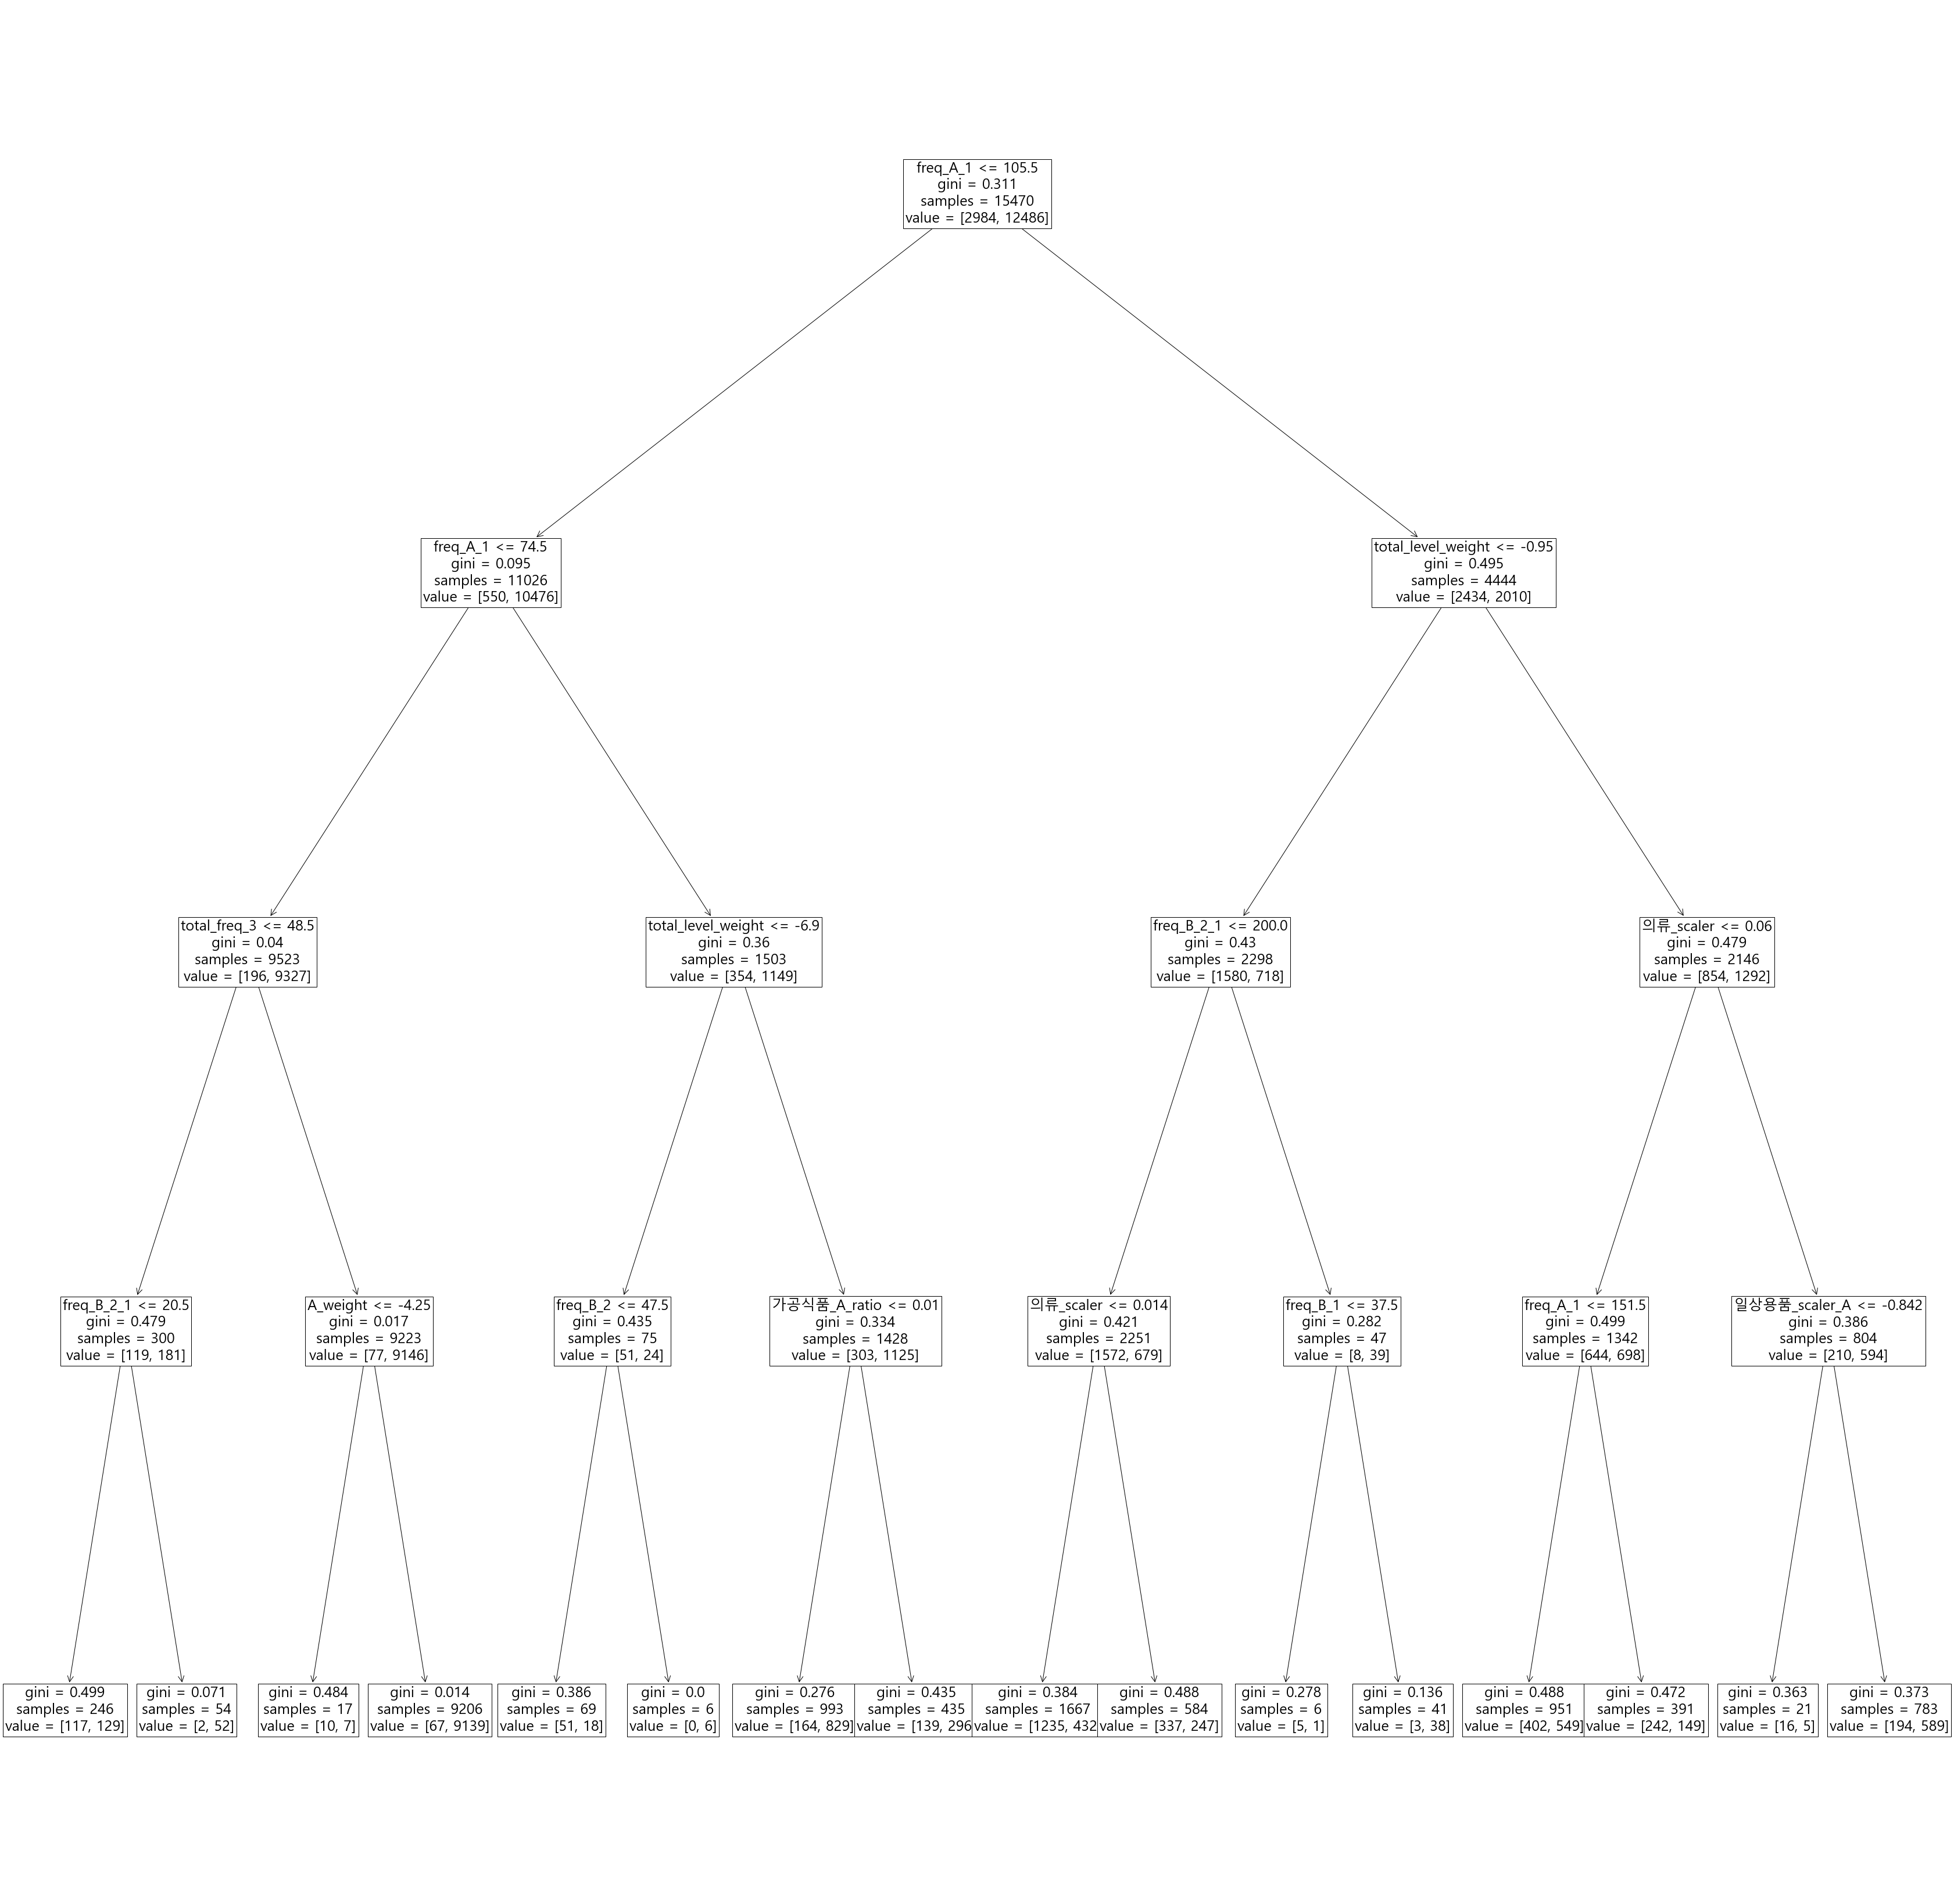

In [99]:
# cluster 0

from sklearn.model_selection import train_test_split
data2 = total_dataset.copy()
data2['cluster'] = data2['cluster'].apply(lambda x: 0 if x==0 else 1)

X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)


from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'freq_B_1 <= 76.5\ngini = 0.254\nsamples = 15470\nvalue = [2310, 13160]'),
 Text(837.0, 2283.12, 'freq_B_1 <= 48.5\ngini = 0.029\nsamples = 10856\nvalue = [158, 10698]'),
 Text(418.5, 1630.8000000000002, 'B_weight <= 4.75\ngini = 0.005\nsamples = 9929\nvalue = [23, 9906]'),
 Text(209.25, 978.48, 'freq_B_1_1 <= 290.5\ngini = 0.004\nsamples = 9913\nvalue = [18, 9895]'),
 Text(104.625, 326.1600000000003, 'gini = 0.003\nsamples = 9910\nvalue = [16, 9894]'),
 Text(313.875, 326.1600000000003, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(627.75, 978.48, 'freq_B_2 <= 104.5\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(523.125, 326.1600000000003, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(732.375, 326.1600000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(1255.5, 1630.8000000000002, 'total_freq_3 <= 76.5\ngini = 0.249\nsamples = 927\nvalue = [135, 792]'),
 Text(1046.25, 978.48, 'age_cat <= 2.5\ngini = 0.5\nsamples = 49\nvalue = [25, 24]'

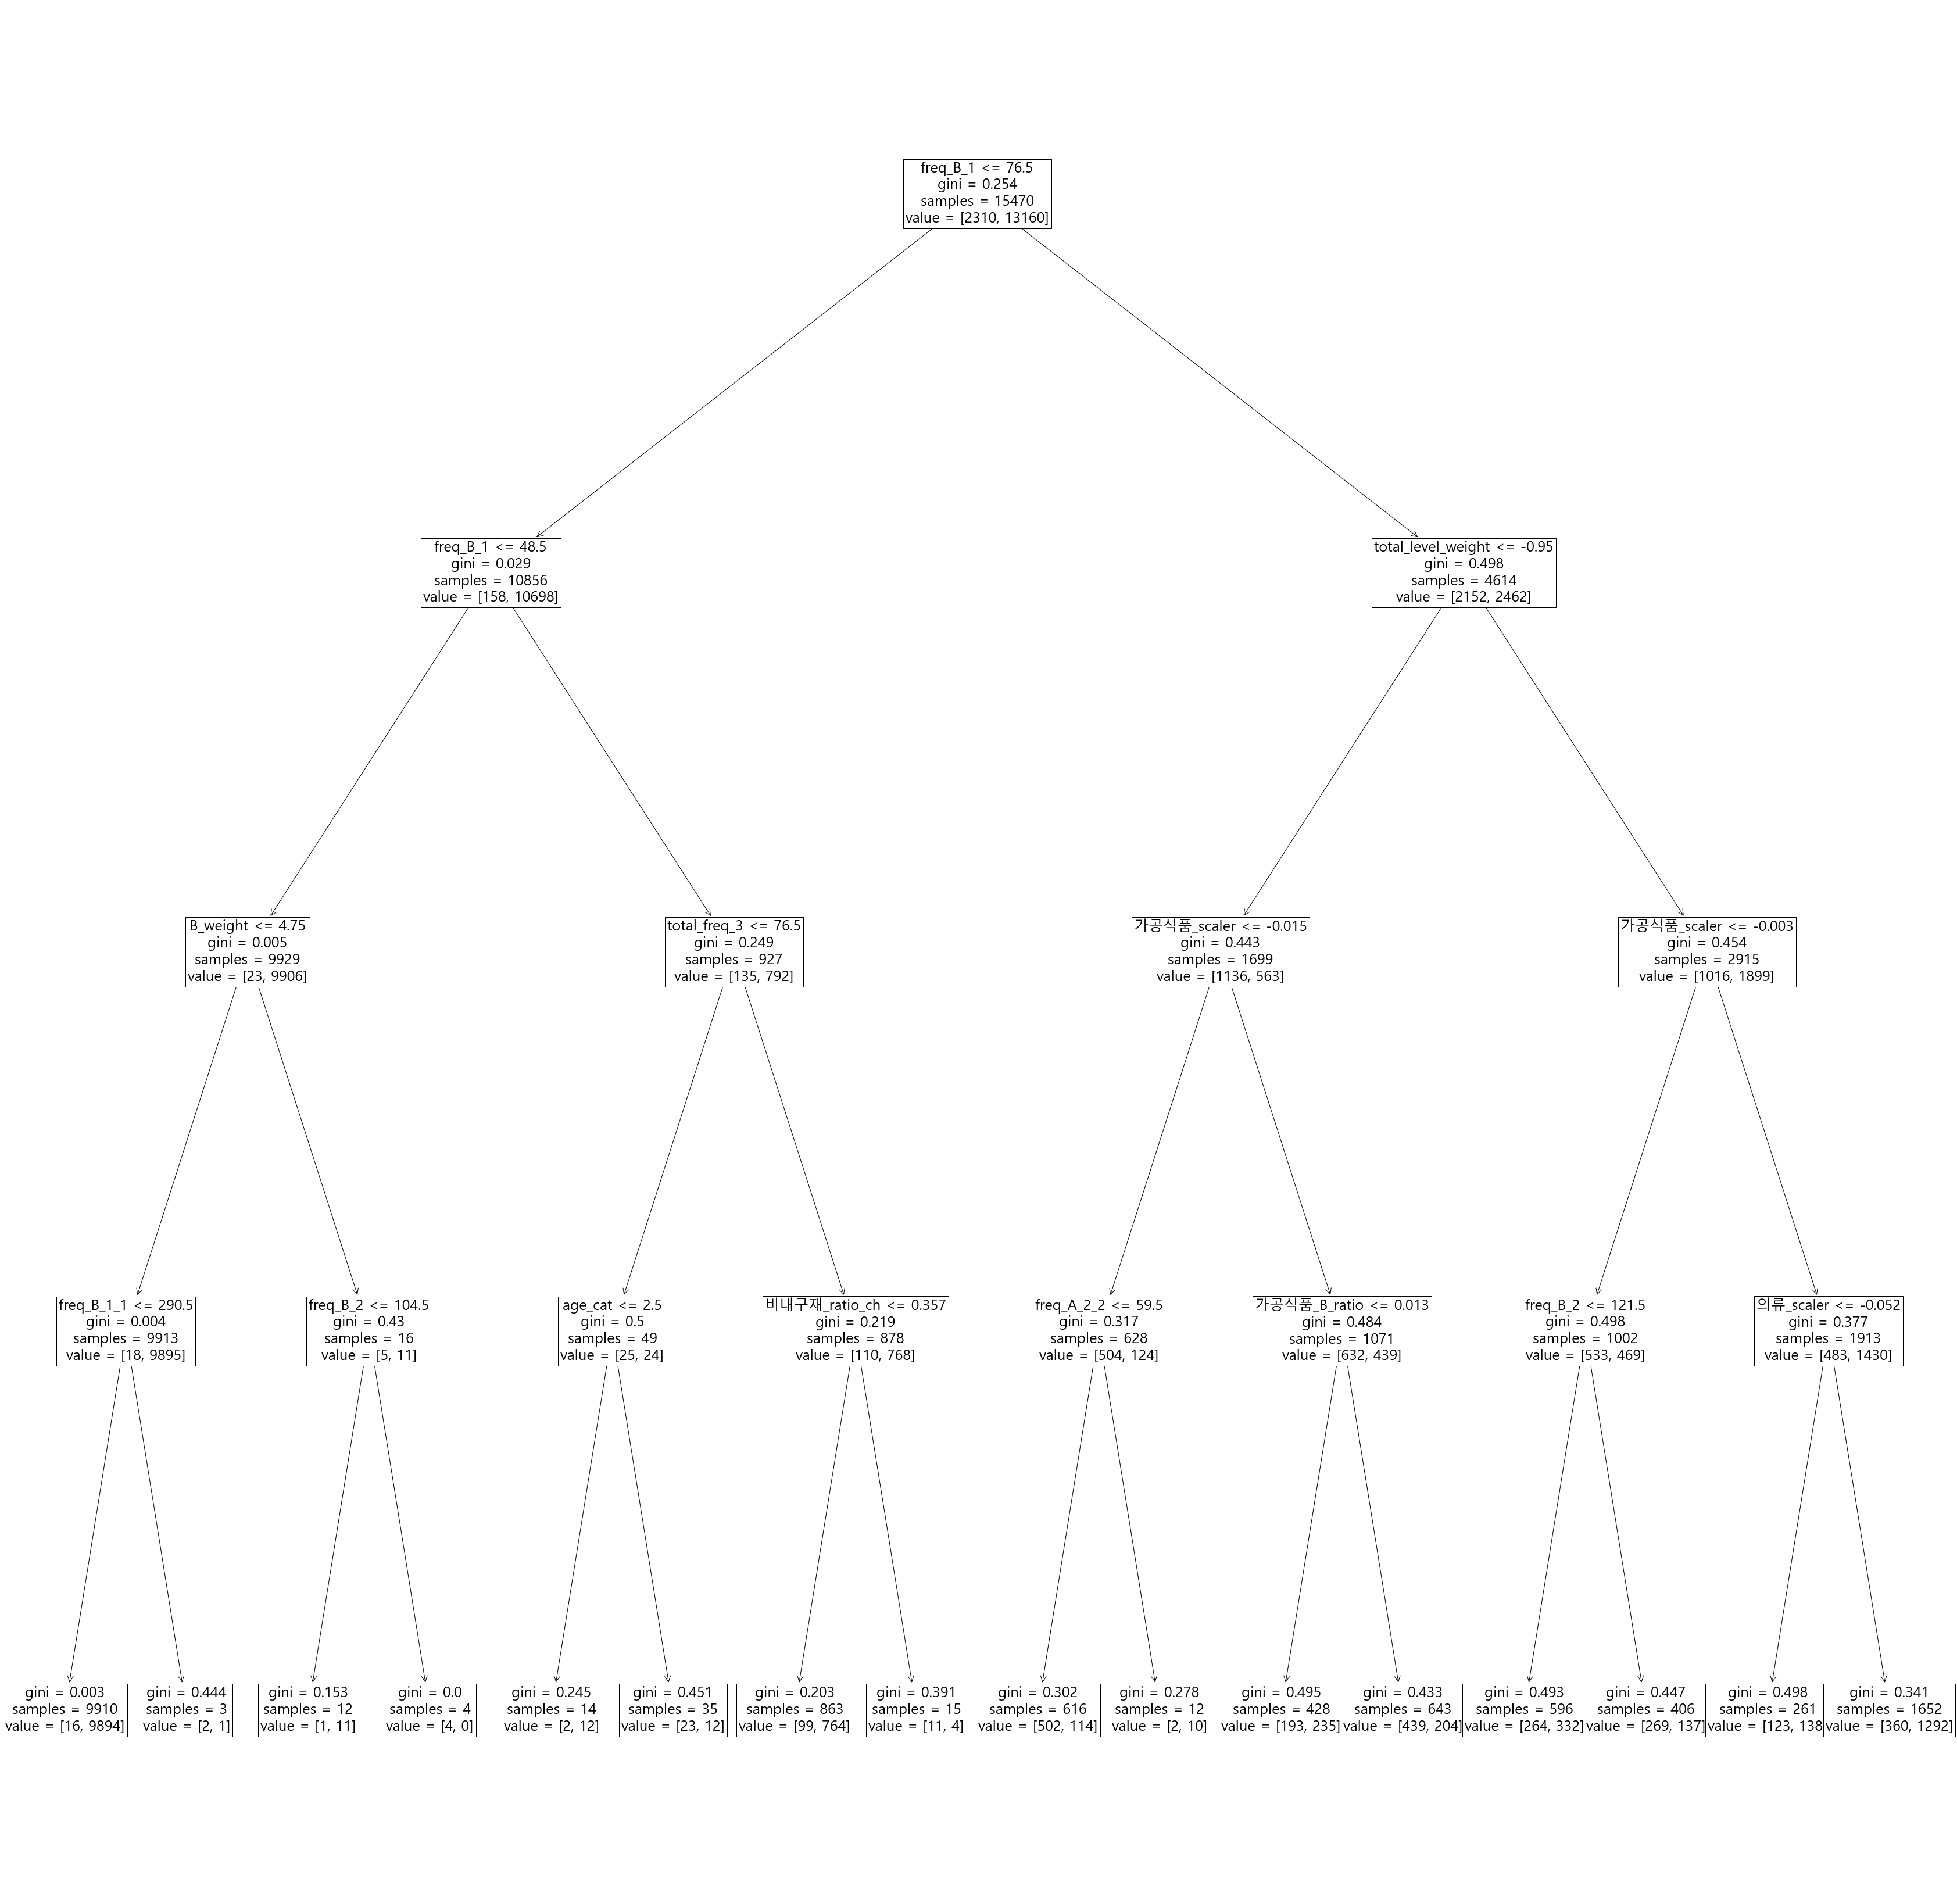

In [100]:
# cluter1

from sklearn.model_selection import train_test_split
data2 = total_dataset.copy()
data2['cluster'] = data2['cluster'].apply(lambda x: 0 if x==1 else 1)


X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'freq_C_1 <= 107.5\ngini = 0.16\nsamples = 15470\nvalue = [1357, 14113]'),
 Text(837.0, 2283.12, 'freq_C_1 <= 79.5\ngini = 0.011\nsamples = 12844\nvalue = [68, 12776]'),
 Text(418.5, 1630.8000000000002, 'freq_C_2_1 <= 229.5\ngini = 0.002\nsamples = 12536\nvalue = [13, 12523]'),
 Text(209.25, 978.48, 'freq_C_1_3 <= 221.0\ngini = 0.0\nsamples = 12447\nvalue = [3, 12444]'),
 Text(104.625, 326.1600000000003, 'gini = 0.0\nsamples = 12445\nvalue = [2, 12443]'),
 Text(313.875, 326.1600000000003, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(627.75, 978.48, 'total_level_weight <= -3.7\ngini = 0.199\nsamples = 89\nvalue = [10, 79]'),
 Text(523.125, 326.1600000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(732.375, 326.1600000000003, 'gini = 0.112\nsamples = 84\nvalue = [5, 79]'),
 Text(1255.5, 1630.8000000000002, 'total_level_weight <= -0.65\ngini = 0.293\nsamples = 308\nvalue = [55, 253]'),
 Text(1046.25, 978.48, 'freq_C_2_2 <= 39.5\ngini = 0.5\nsamples = 

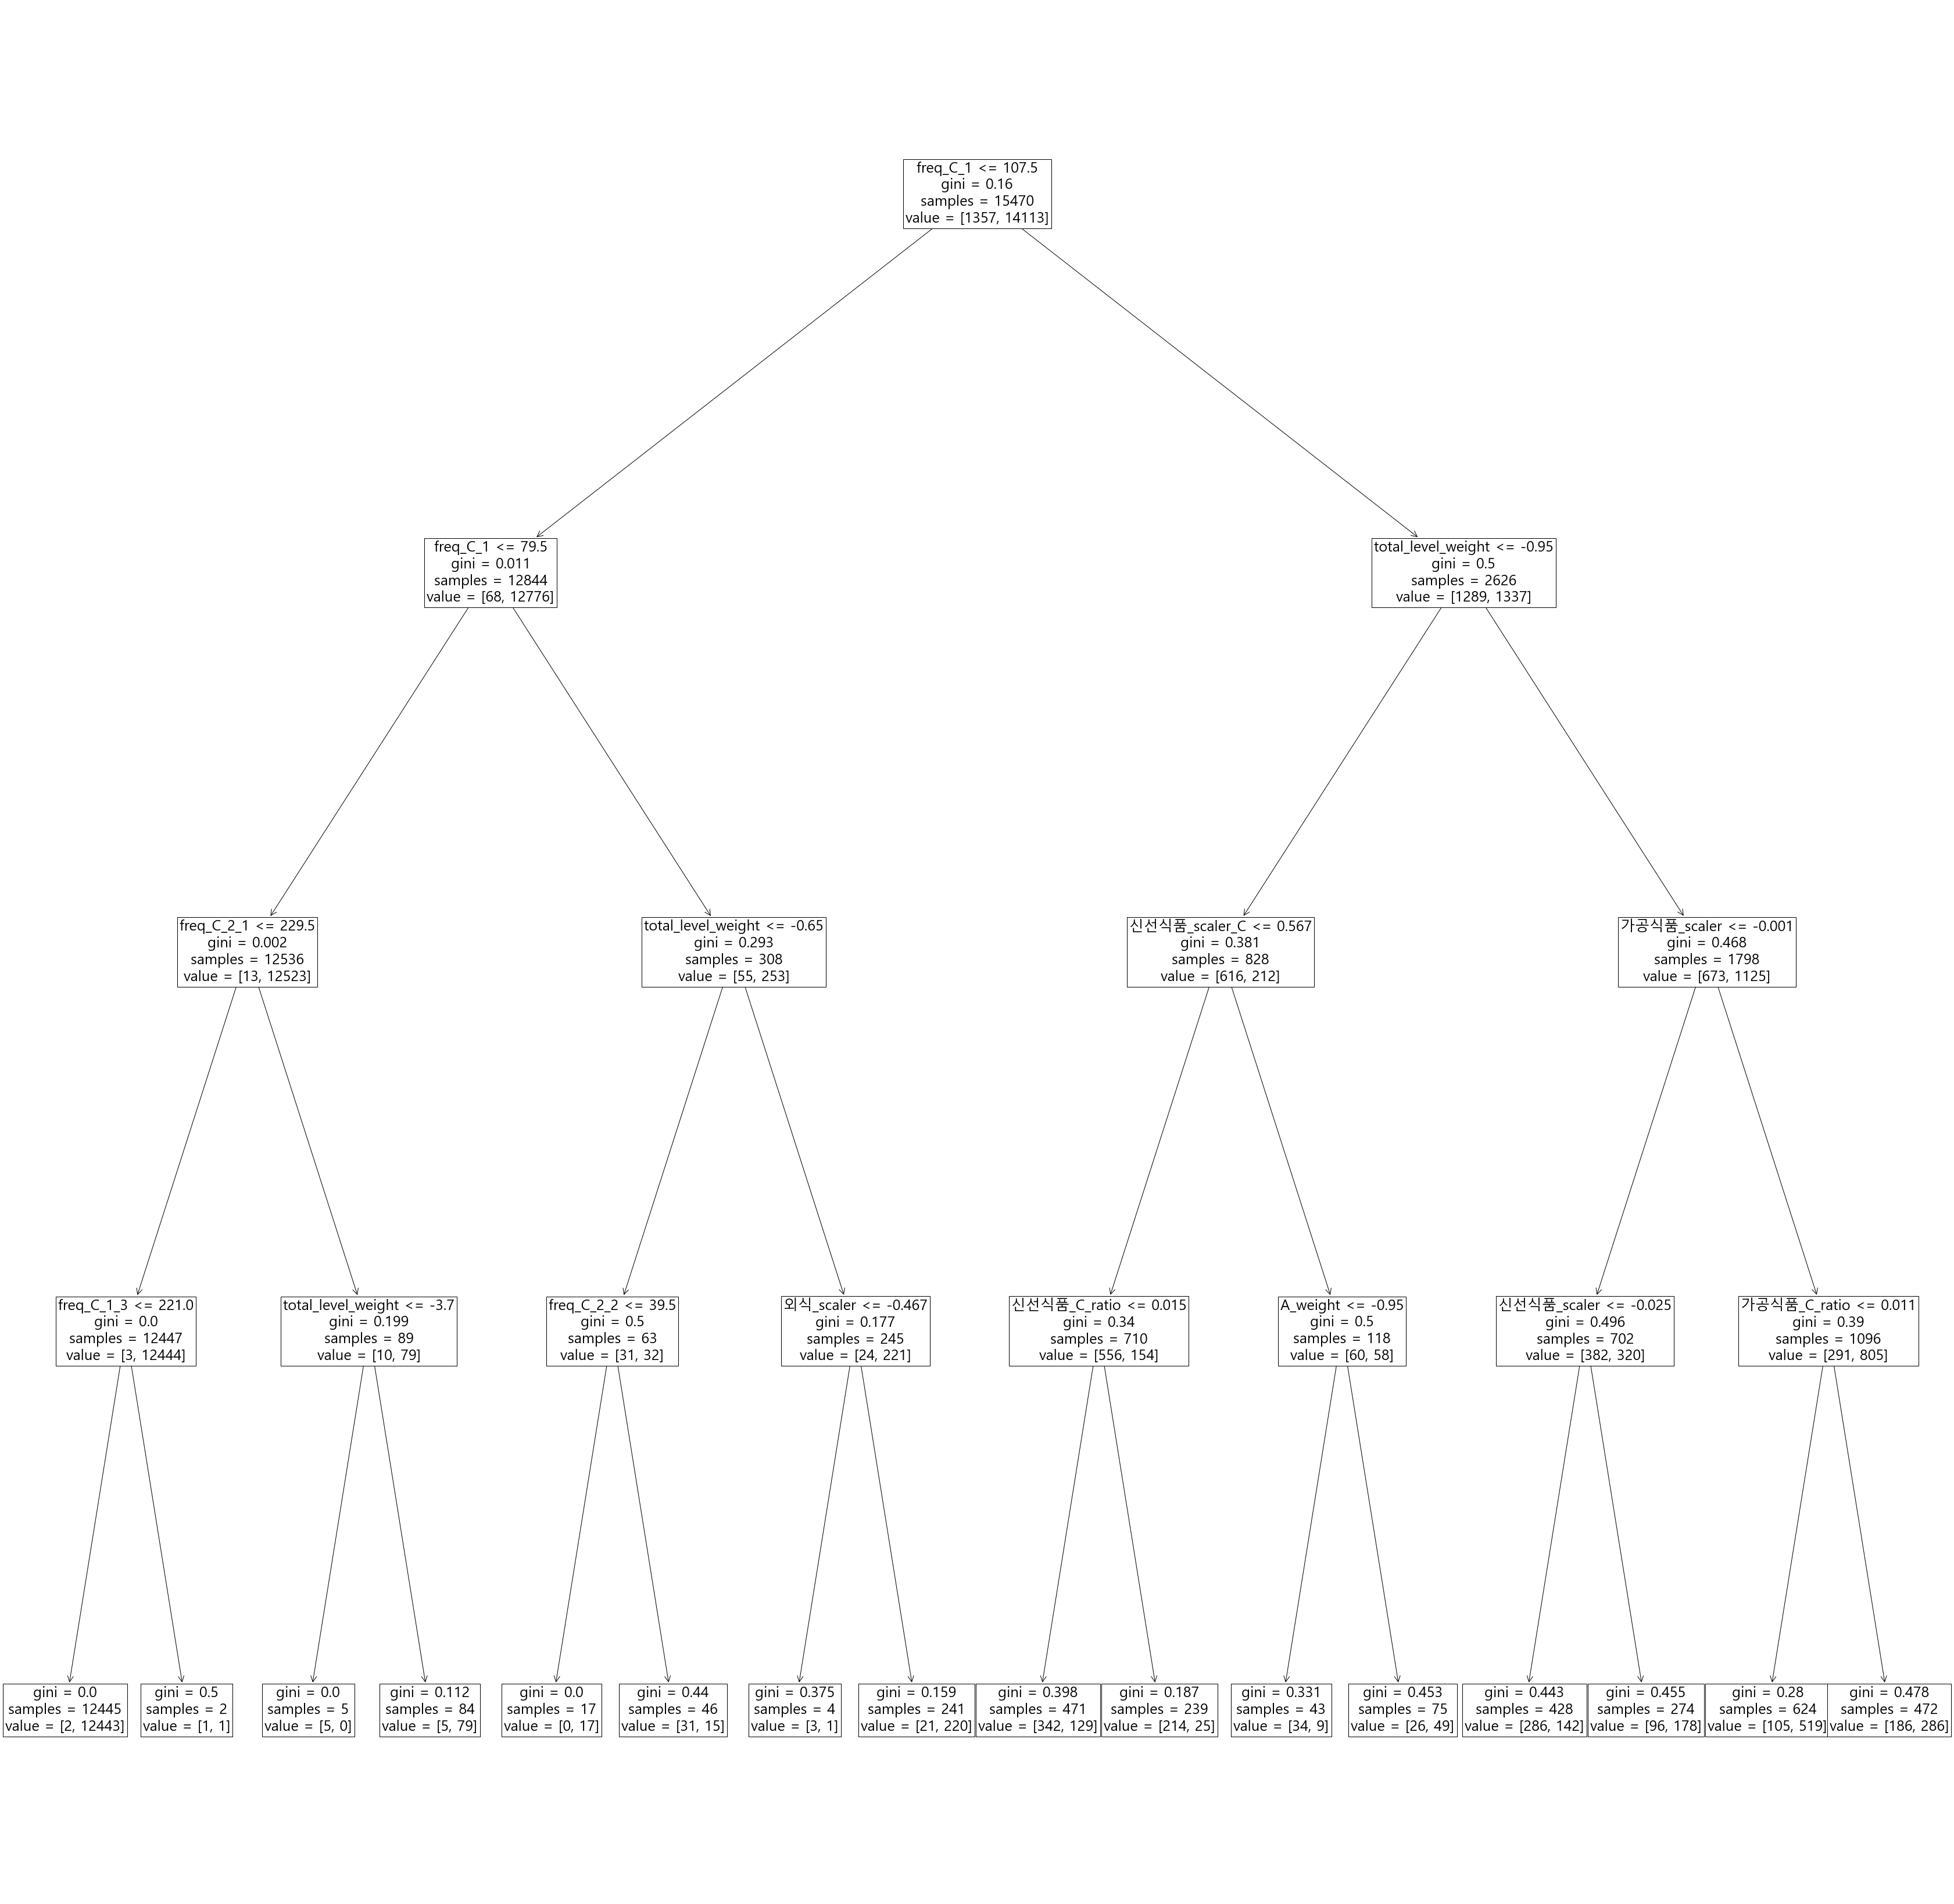

In [101]:
# cluter2

from sklearn.model_selection import train_test_split
data2 = total_dataset.copy()
data2['cluster'] = data2['cluster'].apply(lambda x: 0 if x==2 else 1)


X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'total_level_weight <= -0.95\ngini = 0.49\nsamples = 15470\nvalue = [8819, 6651]'),
 Text(837.0, 2283.12, 'total_freq_1 <= 118.5\ngini = 0.44\nsamples = 5442\nvalue = [1782, 3660]'),
 Text(418.5, 1630.8000000000002, '의류_scaler <= 0.245\ngini = 0.5\nsamples = 1276\nvalue = [630, 646]'),
 Text(209.25, 978.48, '가공식품_scaler <= -0.012\ngini = 0.498\nsamples = 1164\nvalue = [545, 619]'),
 Text(104.625, 326.1600000000003, 'gini = 0.435\nsamples = 291\nvalue = [93, 198]'),
 Text(313.875, 326.1600000000003, 'gini = 0.499\nsamples = 873\nvalue = [452, 421]'),
 Text(627.75, 978.48, 'total_level_weight <= -6.9\ngini = 0.366\nsamples = 112\nvalue = [85, 27]'),
 Text(523.125, 326.1600000000003, 'gini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(732.375, 326.1600000000003, 'gini = 0.263\nsamples = 90\nvalue = [76, 14]'),
 Text(1255.5, 1630.8000000000002, '의류_scaler <= -0.023\ngini = 0.4\nsamples = 4166\nvalue = [1152, 3014]'),
 Text(1046.25, 978.48, '가공식품_scaler <= -0.007\ng

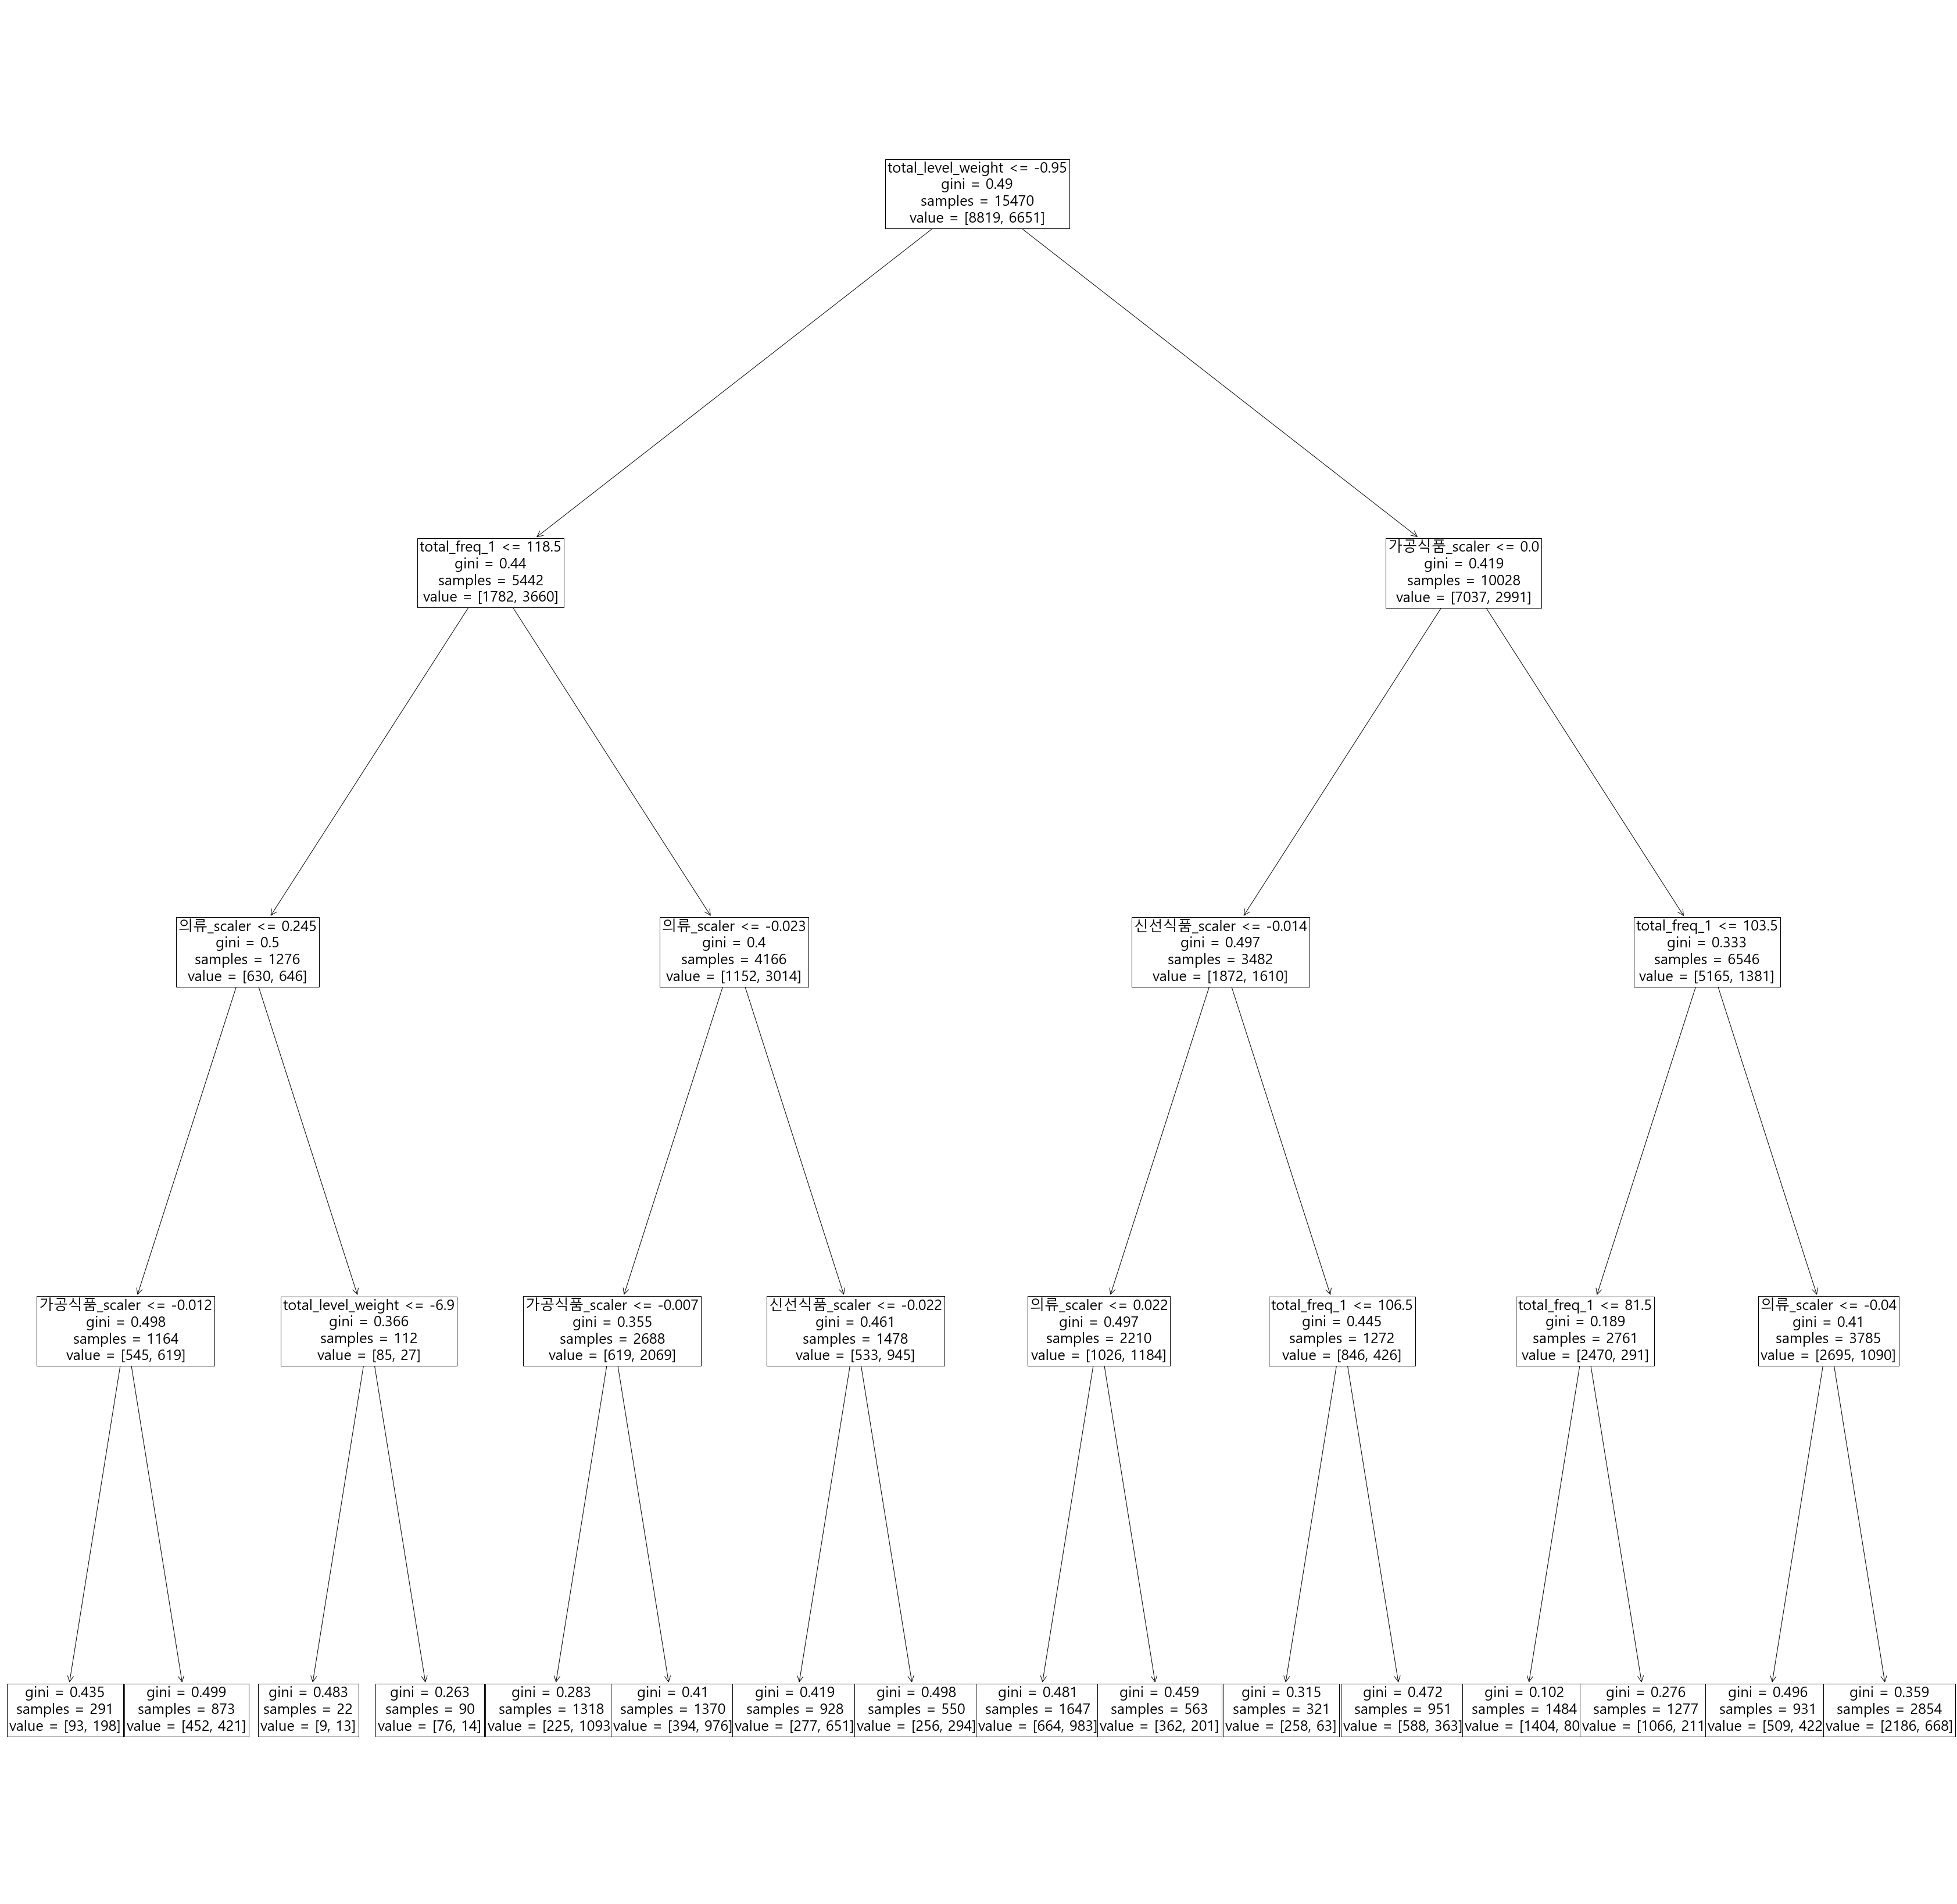

In [102]:
# cluster3 == 증가/유지 고객

from sklearn.model_selection import train_test_split
data3 = total_dataset.copy()
data3['cluster'] = data3['cluster'].apply(lambda x: 0 if x==3 else 1)

X_train, X_test, y_train, y_test = train_test_split(data3.drop(['cluster','cust_no','label'],axis=1),data3['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

In [103]:
total_dataset.pivot_table(index='gender',columns='cluster',values='age_cat', aggfunc='count')

cluster,0.0,1.0,2.0,3.0
gender,,,,
0,680,528,333,1934
1,3042,2328,1372,9121


In [145]:
total_dataset.to_csv('dataset/cluster_data_final.csv',index=False)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(total_dataset.drop(['cluster','label','cust_no','pca_x','pca_y'],axis=1))

total_dataset['pca_x'] = pca_transformed[:,0]
total_dataset['pca_y'] = pca_transformed[:,1]
total_dataset.head()

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,...,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster,pca_x,pca_y
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,...,129.0,1.0,3.0,0.0,10.0,0,5,0.0,-41.039061,-308.692874
1,2,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,0.0,-8.5,...,139.0,1.0,0.0,0.0,0.0,0,5,3.0,-55.925422,-310.491728
2,3,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,0.0,1.0,...,0.0,0.0,2.0,139.0,244.0,0,5,2.0,311.208692,61.716309
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,...,59.0,0.0,21.0,12.0,5.0,1,5,0.0,-34.975745,-172.334706
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,...,110.0,1.0,0.0,0.0,0.0,0,5,0.0,-53.813460,-230.958550


In [80]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '3 Clusters visualization by Reduced Customers')

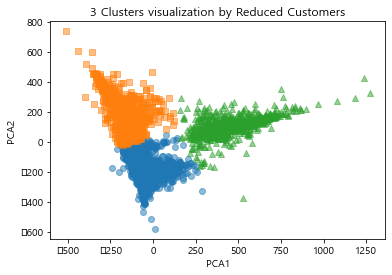

In [82]:
mark0_ind = total_dataset[total_dataset.cluster==0].index
mark1_ind = total_dataset[total_dataset.cluster==1].index
mark2_ind = total_dataset[total_dataset.cluster==2].index
# mark3_ind = total_dataset[total_dataset.cluster==3].index
# mark4_ind = total_dataset[total_dataset.cluster==4].index

plt.scatter(x=total_dataset.loc[mark0_ind,'pca_x'],y=total_dataset.loc[mark0_ind,'pca_y'],marker='o',alpha=0.5)
plt.scatter(x=total_dataset.loc[mark1_ind,'pca_x'],y=total_dataset.loc[mark1_ind,'pca_y'],marker='s',alpha=0.5)
plt.scatter(x=total_dataset.loc[mark2_ind,'pca_x'],y=total_dataset.loc[mark2_ind,'pca_y'],marker='^',alpha=0.5)
# plt.scatter(x=total_dataset.loc[mark3_ind,'pca_x'],y=total_dataset.loc[mark3_ind,'pca_y'],marker='*',alpha=0.5)
# plt.scatter(x=total_dataset.loc[mark4_ind,'pca_x'],y=total_dataset.loc[mark4_ind,'pca_y'],marker='+',alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters visualization by Reduced Customers')

In [84]:
total_dataset.drop(['pca_x','pca_y'],axis=1,inplace=True)
total_dataset.query('cluster==0')

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,...,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,...,4.0,120.0,129.0,1.0,3.0,0.0,10.0,0,5,0.0
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,...,16.0,81.0,59.0,0.0,21.0,12.0,5.0,1,5,0.0
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,...,0.0,183.0,110.0,1.0,0.0,0.0,0.0,0,5,0.0
10,11,-0.125432,0.069261,8.5,5.0,-0.9,-1.8,7.5,-2.0,1.6,...,8.0,95.0,112.0,26.0,4.0,16.0,3.0,0,5,0.0
13,14,0.049160,-0.051150,-4.8,-2.4,-2.5,3.2,1.0,-0.8,-7.5,...,33.0,52.0,75.0,36.0,33.0,36.0,70.0,1,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,19323,0.000000,0.054422,-0.4,-0.1,0.0,-0.6,-0.6,1.4,-0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
19176,19325,-0.101709,-0.014646,-2.0,-2.0,0.0,0.0,-0.9,0.0,-0.2,...,0.0,79.0,46.0,0.0,0.0,0.0,0.0,1,3,0.0
19184,19333,0.000000,-0.069469,-0.6,-0.8,-0.8,0.0,-3.2,0.0,-0.6,...,0.0,69.0,47.0,42.0,43.0,0.0,0.0,1,1,0.0
19195,19344,0.000000,0.092352,0.4,0.8,-0.2,0.4,0.9,0.0,0.1,...,0.0,0.0,14.0,0.0,0.0,0.0,16.0,0,1,0.0


In [107]:
cluster0 = total_dataset.query('cluster==0')
cluster1 = total_dataset.query('cluster==1')
cluster2 = total_dataset.query('cluster==2')

In [121]:
ratio(cluster0[['age_cat']].value_counts())

age_cat
3          0.362440
4          0.273240
2          0.231327
5          0.088931
1          0.044062
dtype: float64

In [122]:
ratio(cluster1.age_cat.value_counts())

3    0.428922
4    0.263655
2    0.211134
5    0.054622
1    0.040966
0    0.000700
Name: age_cat, dtype: float64

In [123]:
ratio(cluster2.age_cat.value_counts())

3    0.464516
4    0.241056
2    0.217009
5    0.049853
1    0.025806
0    0.001760
Name: age_cat, dtype: float64

In [149]:
ratio = lambda x: x/x.sum()
ratio(total_dataset[['cluster']].value_counts()).sort_index()

cluster
0.0        0.192471
1.0        0.147688
2.0        0.088168
3.0        0.571672
dtype: float64

In [120]:
total_dataset[['cluster']].value_counts()

cluster
3.0        11055
0.0         3722
1.0         2856
2.0         1705
dtype: int64

In [124]:
total_dataset

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,...,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,...,4.0,120.0,129.0,1.0,3.0,0.0,10.0,0,5,0.0
1,2,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,0.0,-8.5,...,0.0,183.0,139.0,1.0,0.0,0.0,0.0,0,5,3.0
2,3,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,0.0,1.0,...,127.0,0.0,0.0,0.0,2.0,139.0,244.0,0,5,2.0
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,...,16.0,81.0,59.0,0.0,21.0,12.0,5.0,1,5,0.0
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,...,0.0,183.0,110.0,1.0,0.0,0.0,0.0,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.000000,0.347826,0.1,0.0,0.6,0.0,0.2,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0
19334,19377,0.000000,0.600000,0.1,0.1,0.1,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3.0
19335,19378,0.000000,0.263158,0.2,0.4,0.1,0.0,0.1,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,3.0
19336,19379,0.000000,0.142857,0.3,0.4,0.0,0.0,0.2,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.0


In [141]:
cluster0.columns

Index(['cust_no', '내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight',
       'A_weight', 'B_weight', 'C_weight', 'item_가공식품_weight',
       'item_의약품_weight', 'item_신선식품_weight', 'item_일상용품_weight',
       'item_교육/문화용품_weight', 'item_외식_weight', 'item_패션잡화_weight',
       'item_의류_weight', 'item_기타_weight', 'item_전문스포츠/레저_weight',
       'item_가구/인테리어_weight', 'item_가전_weight', 'item_명품_weight',
       'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
       '비내구재_ratio_ch', '가공식품_A_ratio', '신선식품_A_ratio', '일상용품_A_ratio',
       '의류_A_ratio', '가공식품_B_ratio', '신선식품_B_ratio', '일상용품_B_ratio',
       '가공식품_C_ratio', '신선식품_C_ratio', '일상용품_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler', '의류_scaler',
       '의약품_scaler', '전문스포츠/레저_scaler', '패션잡화_scaler', '가공식품_scaler_A',
       '가공식품_scaler_C', '신선식품_scaler_A', '신선식품_scaler_C', '일상용품_scaler_A',
       '일상용품_scaler_B', '일

In [142]:
cluster0['total_level_weight'].mean()

-1.5273508866200964

In [143]:
cluster1['total_level_weight'].mean()

-0.7314775910364145

In [144]:
cluster2['total_level_weight'].mean()

-0.6405865102639297

In [146]:
pv = total_dataset.drop(['cust_no','label'],axis=1).groupby('cluster').mean()

In [148]:
pd.set_option('max_columns',None)
pv

,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.025986,-0.015881,-1.527351,-1.010613,0.020177,-0.013595,0.014105,-0.002257,-0.302472,-0.502687,-0.078049,0.187399,-0.462386,-1.066416,0.096051,-0.517517,-0.299409,-0.460210,-0.362225,-0.302096,0.993740,0.014957,0.005528,0.003035,0.003748,-0.009379,0.001816,0.001489,0.000681,0.001213,0.000601,0.000254,0.754343,-0.003173,-0.091843,-0.127029,-0.042591,-0.060464,-0.080509,-0.106036,-0.229755,-0.215401,-0.018893,-0.130201,-0.149238,-0.094032,-0.012519,-0.134579,-0.039095,-0.124976,-0.023338,0.003932,-0.046644,148.856797,131.644009,64.616067,67.027942,10.943579,5.396561,5.547018,5.486029,2.872649,2.613380,139.360290,121.673563,58.504030,63.169533,10.969909,5.488447,5.481462,5.848469,2.731059,3.117410,153.590543,137.960505,9.568780,5.213864,81.697206,83.104782,23.247716,24.825094,10.656099,12.099946,0.817303,3.131650
1.0,-0.018833,-0.006457,-0.731478,-0.198845,-0.710609,-0.039741,-0.536940,0.034839,-0.474790,-0.247934,-0.465091,0.291422,-0.282738,-0.406933,0.842262,-0.581232,-0.110189,-0.457283,-0.036029,-0.573004,-0.112955,0.019988,0.000262,0.000131,-0.000654,-0.004929,0.006364,0.009828,0.002122,0.000671,0.000186,0.000093,-0.304823,-0.058281,-0.058404,-0.042232,-0.091660,0.050761,-0.058302,-0.129489,-0.089606,-0.044414,-0.055501,-0.024097,-0.020610,-0.045153,-0.012896,-0.018988,-0.043825,-0.038759,-0.132176,-0.043104,-0.319927,131.801120,12.526261,6.016807,6.509454,114.735644,58.333333,56.402311,4.464286,2.340336,2.123950,123.178571,11.936625,5.737045,6.199580,106.879902,53.306723,53.573179,4.251401,1.967087,2.284314,134.061625,13.725840,116.094888,4.182073,6.878501,6.576331,212.261905,211.794818,7.023810,8.156513,0.815126,3.077731
2.0,-0.004448,-0.007687,-0.640587,-0.195425,-0.164340,-0.636833,-0.738299,0.035718,-0.850616,-0.008328,-0.136422,0.017713,-0.147625,-0.222581,0.046569,-0.161994,-0.119062,0.200059,-0.060176,-0.457713,-0.548387,0.011750,0.000183,0.000080,-0.000145,-0.005309,-0.000846,0.000053,-0.000109,0.009908,0.005056,0.000763,-0.590692,-0.075901,-0.032500,-0.012034,-0.032068,-0.064778,-0.031418,-0.133528,-0.150701,-0.037203,-0.035123,0.001593,-0.024306,-0.040348,-0.095625,-0.019202,-0.415775,-0.022642,-0.017724,-0.015180,-0.065881,187.554839,8.400587,4.056305,4.344282,6.263930,3.236364,3.027566,172.856305,89.188270,83.668035,171.178299,7.465103,3.561290,3.903812,5.749560,2.882698,2.866862,157.906745,78.434604,79.472141,188.420528,9.279765,6.750733,172.358358,4.697361,4.441642,12.833431,11.842229,272.207625,283.842815,0.804692,3.066862
3.0,0.012556,-0.005559,1.580507,0.724568,0.604324,0.334310,1.059222,0.233668,0.759258,0.850475,0.171868,0.878064,0.480814,0.942732,0.453876,0.330430,0.265491,0.156979,0.194075,0.027227,0.688005,-0.014834,0.000629,-0.000703,-0.000788,0.000729,-0.000786,0.003068,-0.000909,-0.001832,-0.000160,-0.000731,-0.084121,0.027789,0.051069,0.055

In [150]:
(pv['total_freq_1']+pv['total_freq_2']+pv['total_freq_3'])/3

cluster
0.0    147.269210
1.0    129.680439
2.0    182.384555
3.0    136.839379
dtype: float64

<AxesSubplot:>

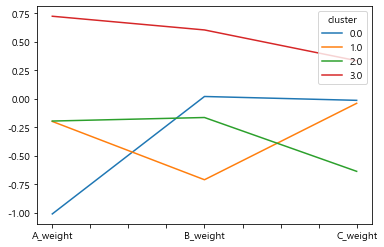

In [156]:
plt.rcParams['axes.unicode_minus'] = False
pv[['A_weight','B_weight','C_weight']].T.plot()

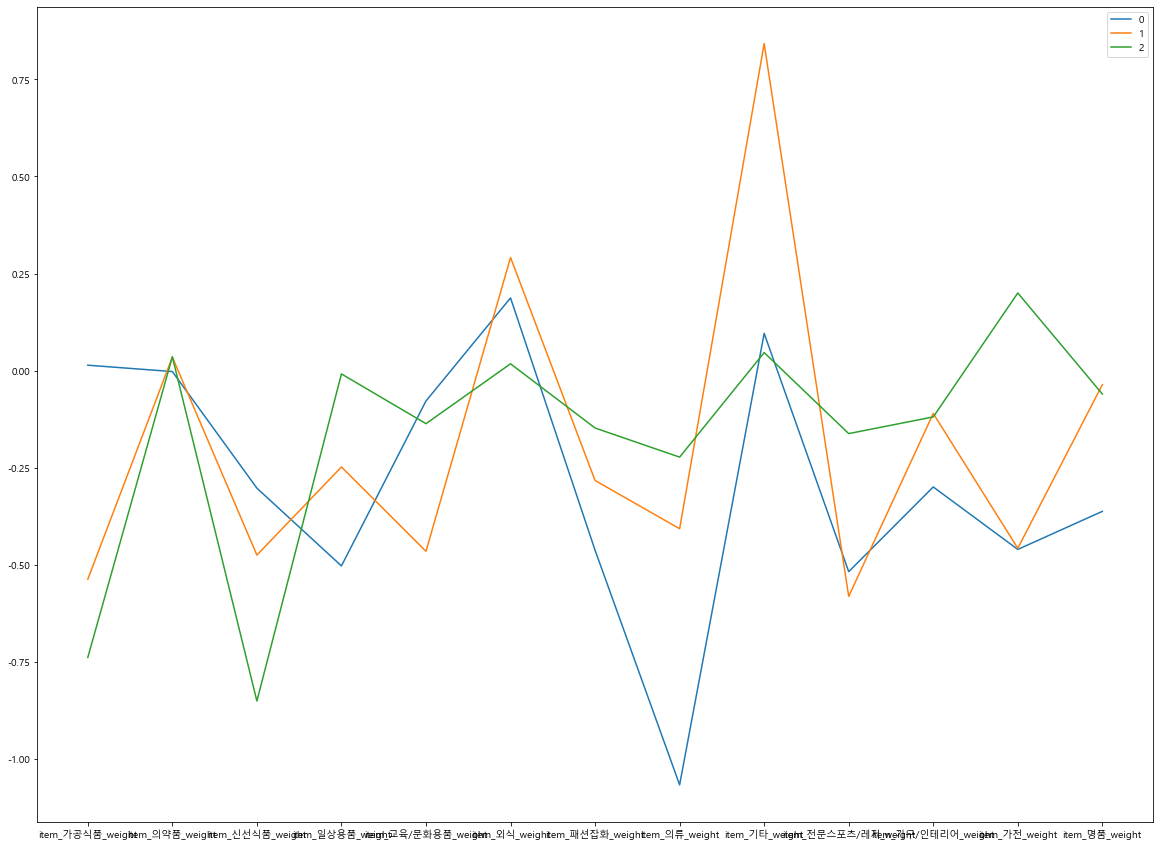

In [175]:
plt.figure(figsize=(20,15))
plt.plot(pv[pv.columns[pv.columns.str.contains('item')]].T.drop(3,axis=1), label=[0,1,2,3])
plt.legend('best',labels=[0,1,2,3])

In [176]:
(pv['freq_A_1']+pv['freq_A_2']+pv['freq_A_3'])/3

cluster
0.0    130.426025
1.0     12.729575
2.0      8.381818
3.0     56.301794
dtype: float64

In [177]:
(pv['freq_B_1']+pv['freq_B_2']+pv['freq_B_3'])/3

cluster
0.0     10.494089
1.0    112.570145
2.0      6.254741
3.0     44.944218
dtype: float64

In [178]:
(pv['freq_C_1']+pv['freq_C_2']+pv['freq_C_3'])/3

cluster
0.0      5.516120
1.0      4.299253
2.0    167.707136
3.0     34.790864
dtype: float64

In [179]:
mem = pd.read_csv('최종/원본dataframe/멤버십여부.txt',encoding='CP949')
mem

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [180]:
mem.가입년월 = mem.가입년월.apply(lambda x: str(x)+'01')

In [181]:
# def memb(x,d):
    
xx = mem.pivot_table(index='고객번호',columns='멤버십명',values='가입년월',aggfunc='sum')
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaN,NaN,NaN,20151201
21,NaN,NaN,NaN,20150601
37,NaN,NaN,NaN,20130601
43,NaN,NaN,NaN,20140301
44,NaN,NaN,NaN,20141101
...,...,...,...,...
19377,NaN,NaN,20141101,NaN
19379,NaN,NaN,20141201,NaN
19380,NaN,NaN,20141201,NaN


In [182]:

for i in xx.columns:
    xx[i] = pd.to_datetime(xx[i])
    
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaT,NaT,NaT,2015-12-01
21,NaT,NaT,NaT,2015-06-01
37,NaT,NaT,NaT,2013-06-01
43,NaT,NaT,NaT,2014-03-01
44,NaT,NaT,NaT,2014-11-01
...,...,...,...,...
19377,NaT,NaT,2014-11-01,NaT
19379,NaT,NaT,2014-12-01,NaT
19380,NaT,NaT,2014-12-01,NaT


In [184]:
from datetime import datetime
import numpy as np
from dateutil.relativedelta import relativedelta


dt = datetime(2015,12,1)

for i in xx.columns:
    xx[i] = xx[i].apply(lambda x : relativedelta(dt,x).months if type(x) != pd._libs.tslibs.nattype.NaTType else np.nan)

    
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaN,NaN,NaN,0.0
21,NaN,NaN,NaN,6.0
37,NaN,NaN,NaN,6.0
43,NaN,NaN,NaN,9.0
44,NaN,NaN,NaN,1.0
...,...,...,...,...
19377,NaN,NaN,1.0,NaN
19379,NaN,NaN,0.0,NaN
19380,NaN,NaN,0.0,NaN


In [187]:
import numpy as np
xx['membership'] = xx.apply(lambda x : (x[x>=0]).max() if x.any()>0 else np.nan, axis=1)
xx

멤버십명,다둥이,더영,롭스,하이마트,mem_2,membership
고객번호,,,,,,
11,NaN,NaN,NaN,0.0,NaN,NaN
21,NaN,NaN,NaN,6.0,6.0,6.0
37,NaN,NaN,NaN,6.0,6.0,6.0
43,NaN,NaN,NaN,9.0,9.0,9.0
44,NaN,NaN,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...
19377,NaN,NaN,1.0,NaN,1.0,1.0
19379,NaN,NaN,0.0,NaN,NaN,NaN
19380,NaN,NaN,0.0,NaN,NaN,NaN


In [190]:
xx.index.name='cust_no'
xx

cust_no,다둥이,더영,롭스,하이마트,mem_2,membership
cust_no,,,,,,
11,NaN,NaN,NaN,0.0,NaN,NaN
21,NaN,NaN,NaN,6.0,6.0,6.0
37,NaN,NaN,NaN,6.0,6.0,6.0
43,NaN,NaN,NaN,9.0,9.0,9.0
44,NaN,NaN,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...
19377,NaN,NaN,1.0,NaN,1.0,1.0
19379,NaN,NaN,0.0,NaN,NaN,NaN
19380,NaN,NaN,0.0,NaN,NaN,NaN


In [193]:
total_dataset = pd.merge(total_dataset, xx['membership'].reset_index(),
                        on='cust_no', how='left')

In [194]:
total_dataset

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,label,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster,membership
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,-0.154921,-0.059181,0.001018,-0.024991,0.056971,0.001167,0.003781,0.000000,0.002726,-0.000112,0.000339,1,1.565603,-0.191570,0.207978,0.108425,0.004597,-0.077438,0.052724,-0.004460,1.771044,0.117066,0.250638,-0.464549,0.059790,-2.463036,0.011617,-0.065144,-0.117666,-0.446867,-0.014133,0.009114,-0.014778,219.0,206.0,95.0,111.0,4.0,1.0,3.0,9.0,4.0,5.0,185.0,173.0,105.0,68.0,4.0,3.0,1.0,8.0,3.0,5.0,159.0,154.0,1.0,4.0,120.0,129.0,1.0,3.0,0.0,10.0,0,5,0.0,NaN
1,2,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5,-0.051422,-0.014897,-0.036784,-0.007054,0.086147,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0,1.565603,-0.050532,-0.273373,0.175166,0.004597,-0.077438,0.218670,-1.054057,-1.661778,0.663553,0.388358,-0.459825,-0.119117,-0.640089,-0.014027,-1.768503,-0.054547,0.278960,0.035579,0.003373,-0.014778,167.0,166.0,95.0,71.0,1.0,0.0,1.0,0.0,0.0,0.0,166.0,157.0,93.0,64.0,3.0,2.0,1.0,0.0,0.0,0.0,188.0,187.0,1.0,0.0,183.0,139.0,1.0,0.0,0.0,0.0,0,5,3.0,NaN
2,3,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,-0.010291,0.000000,0.000000,0.000000,-0.046992,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,1,-1.572816,-0.019818,-0.017734,-0.006975,0.004597,-0.077438,-0.027585,-0.028904,-0.143783,-0.032107,-0.024802,0.018879,-0.009548,-0.035815,-0.078829,-0.016622,0.034141,-0.020036,-0.014133,0.018152,-0.014778,168.0,0.0,0.0,0.0,1.0,1.0,0.0,167.0,93.0,74.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,37.0,57.0,128.0,1.0,0.0,127.0,0.0,0.0,0.0,2.0,139.0,244.0,0,5,2.0,NaN
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,-0.112184,0.001611,0.033525,0.027374,-0.042642,0.013859,0.011085,0.001807,0.002957,-0.010797,-0.000637,1,0.170750,-0.005483,-0.020672,-0.006975,0.004597,-0.077438,-0.027585,-0.002416,0.739670,-0.135921,-0.281542,-0.087661,-0.171130,-0.202123,-0.011469,0.143570,-0.469021,0.039655,-0.004717,-0.000024,0.363301,105.0,84.0,47.0,37.0,12.0,6.0,6.0,9.0,3.0,6.0,134.0,112.0,58.0,54.0,8.0,2.0,6.0,14.0,6.0,8.0,137.0,118.0,3.0,16.0,81.0,59.0,0.0,21.0,12.0,5.0,1,5,0.0,NaN
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,0.016182,0.070077,-0.026430,-0.037808,0.029534,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,1,-0.177963,-0.042285,-0.017734,-0.026763,0.004597,-0.077438,-0.036677,-0.391642,-1.359328,-0.032172,0.011207,-0.000882,-0.054607,-0.555796,-0.014027,-0.596384,-0.054547,-0.337272,-0.014133,0.003373,-0.014778,75.0,75.0,59.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,78.0,59.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,219.0,1.0,0.0,183.0,110.0,1.0,0.0,0.0,0.0,0,5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [197]:
pv = total_dataset.drop(['cust_no','label'],axis=1).fillna(0).groupby('cluster').mean()

In [198]:
pv

,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,membership
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.025986,-0.015881,-1.527351,-1.010613,0.020177,-0.013595,0.014105,-0.002257,-0.302472,-0.502687,-0.078049,0.187399,-0.462386,-1.066416,0.096051,-0.517517,-0.299409,-0.460210,-0.362225,-0.302096,0.993740,0.014957,0.005528,0.003035,0.003748,-0.009379,0.001816,0.001489,0.000681,0.001213,0.000601,0.000254,0.754343,-0.003173,-0.091843,-0.127029,-0.042591,-0.060464,-0.080509,-0.106036,-0.229755,-0.215401,-0.018893,-0.130201,-0.149238,-0.094032,-0.012519,-0.134579,-0.039095,-0.124976,-0.023338,0.003932,-0.046644,148.856797,131.644009,64.616067,67.027942,10.943579,5.396561,5.547018,5.486029,2.872649,2.613380,139.360290,121.673563,58.504030,63.169533,10.969909,5.488447,5.481462,5.848469,2.731059,3.117410,153.590543,137.960505,9.568780,5.213864,81.697206,83.104782,23.247716,24.825094,10.656099,12.099946,0.817303,3.131650,1.429608
1.0,-0.018833,-0.006457,-0.731478,-0.198845,-0.710609,-0.039741,-0.536940,0.034839,-0.474790,-0.247934,-0.465091,0.291422,-0.282738,-0.406933,0.842262,-0.581232,-0.110189,-0.457283,-0.036029,-0.573004,-0.112955,0.019988,0.000262,0.000131,-0.000654,-0.004929,0.006364,0.009828,0.002122,0.000671,0.000186,0.000093,-0.304823,-0.058281,-0.058404,-0.042232,-0.091660,0.050761,-0.058302,-0.129489,-0.089606,-0.044414,-0.055501,-0.024097,-0.020610,-0.045153,-0.012896,-0.018988,-0.043825,-0.038759,-0.132176,-0.043104,-0.319927,131.801120,12.526261,6.016807,6.509454,114.735644,58.333333,56.402311,4.464286,2.340336,2.123950,123.178571,11.936625,5.737045,6.199580,106.879902,53.306723,53.573179,4.251401,1.967087,2.284314,134.061625,13.725840,116.094888,4.182073,6.878501,6.576331,212.261905,211.794818,7.023810,8.156513,0.815126,3.077731,2.814776
2.0,-0.004448,-0.007687,-0.640587,-0.195425,-0.164340,-0.636833,-0.738299,0.035718,-0.850616,-0.008328,-0.136422,0.017713,-0.147625,-0.222581,0.046569,-0.161994,-0.119062,0.200059,-0.060176,-0.457713,-0.548387,0.011750,0.000183,0.000080,-0.000145,-0.005309,-0.000846,0.000053,-0.000109,0.009908,0.005056,0.000763,-0.590692,-0.075901,-0.032500,-0.012034,-0.032068,-0.064778,-0.031418,-0.133528,-0.150701,-0.037203,-0.035123,0.001593,-0.024306,-0.040348,-0.095625,-0.019202,-0.415775,-0.022642,-0.017724,-0.015180,-0.065881,187.554839,8.400587,4.056305,4.344282,6.263930,3.236364,3.027566,172.856305,89.188270,83.668035,171.178299,7.465103,3.561290,3.903812,5.749560,2.882698,2.866862,157.906745,78.434604,79.472141,188.420528,9.279765,6.750733,172.358358,4.697361,4.441642,12.833431,11.842229,272.207625,283.842815,0.804692,3.066862,1.155425
3.0,0.012556,-0.005559,1.580507,0.724568,0.604324,0.334310,1.059222,0.233668,0.759258,0.850475,0.171868,0.878064,0.480814,0.942732,0.453876,0.330430,0.265491,0.156979,0.194075,0.027227,0.688005,-0.014834,0.000629,-0.000703,-0.000788,0.000729,-0.000786,0.003068,-0.000909,-0.001832,-0.000160,-0.0

In [199]:
online = pd.read_csv('최종/원본dataframe/채널이용.txt',encoding='CP949')
online

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


In [202]:
online['제휴사'] = online['제휴사'].apply(lambda x: 'APP' if 'APP' in x else 'Mall')
online

,고객번호,제휴사,이용횟수
0,7,APP,4
1,14,APP,1
2,42,APP,23
3,74,APP,1
4,74,APP,30
...,...,...,...
8819,19168,Mall,18
8820,19291,Mall,1
8821,19312,Mall,137
8822,19351,Mall,19


In [203]:
pv2 = online.pivot_table(index='고객번호',columns='제휴사',values='이용횟수',aggfunc='sum')
pv2

제휴사,APP,Mall
고객번호,,
7,4.0,NaN
14,1.0,NaN
42,23.0,NaN
74,31.0,11.0
94,14.0,NaN
...,...,...
19376,1.0,NaN
19377,5.0,NaN
19380,1.0,NaN


In [204]:
pv2.index.name='cust_no'
total_dataset = pd.merge(total_dataset, pv2.reset_index(),
                        on='cust_no',how='left')
total_dataset

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,label,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster,membership,APP,Mall
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,-0.154921,-0.059181,0.001018,-0.024991,0.056971,0.001167,0.003781,0.000000,0.002726,-0.000112,0.000339,1,1.565603,-0.191570,0.207978,0.108425,0.004597,-0.077438,0.052724,-0.004460,1.771044,0.117066,0.250638,-0.464549,0.059790,-2.463036,0.011617,-0.065144,-0.117666,-0.446867,-0.014133,0.009114,-0.014778,219.0,206.0,95.0,111.0,4.0,1.0,3.0,9.0,4.0,5.0,185.0,173.0,105.0,68.0,4.0,3.0,1.0,8.0,3.0,5.0,159.0,154.0,1.0,4.0,120.0,129.0,1.0,3.0,0.0,10.0,0,5,0.0,NaN,NaN,NaN
1,2,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5,-0.051422,-0.014897,-0.036784,-0.007054,0.086147,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0,1.565603,-0.050532,-0.273373,0.175166,0.004597,-0.077438,0.218670,-1.054057,-1.661778,0.663553,0.388358,-0.459825,-0.119117,-0.640089,-0.014027,-1.768503,-0.054547,0.278960,0.035579,0.003373,-0.014778,167.0,166.0,95.0,71.0,1.0,0.0,1.0,0.0,0.0,0.0,166.0,157.0,93.0,64.0,3.0,2.0,1.0,0.0,0.0,0.0,188.0,187.0,1.0,0.0,183.0,139.0,1.0,0.0,0.0,0.0,0,5,3.0,NaN,NaN,NaN
2,3,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,-0.010291,0.000000,0.000000,0.000000,-0.046992,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,1,-1.572816,-0.019818,-0.017734,-0.006975,0.004597,-0.077438,-0.027585,-0.028904,-0.143783,-0.032107,-0.024802,0.018879,-0.009548,-0.035815,-0.078829,-0.016622,0.034141,-0.020036,-0.014133,0.018152,-0.014778,168.0,0.0,0.0,0.0,1.0,1.0,0.0,167.0,93.0,74.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,37.0,57.0,128.0,1.0,0.0,127.0,0.0,0.0,0.0,2.0,139.0,244.0,0,5,2.0,NaN,NaN,NaN
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,-0.112184,0.001611,0.033525,0.027374,-0.042642,0.013859,0.011085,0.001807,0.002957,-0.010797,-0.000637,1,0.170750,-0.005483,-0.020672,-0.006975,0.004597,-0.077438,-0.027585,-0.002416,0.739670,-0.135921,-0.281542,-0.087661,-0.171130,-0.202123,-0.011469,0.143570,-0.469021,0.039655,-0.004717,-0.000024,0.363301,105.0,84.0,47.0,37.0,12.0,6.0,6.0,9.0,3.0,6.0,134.0,112.0,58.0,54.0,8.0,2.0,6.0,14.0,6.0,8.0,137.0,118.0,3.0,16.0,81.0,59.0,0.0,21.0,12.0,5.0,1,5,0.0,NaN,NaN,NaN
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,0.016182,0.070077,-0.026430,-0.037808,0.029534,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,1,-0.177963,-0.042285,-0.017734,-0.026763,0.004597,-0.077438,-0.036677,-0.391642,-1.359328,-0.032172,0.011207,-0.000882,-0.054607,-0.555796,-0.014027,-0.596384,-0.054547,-0.337272,-0.014133,0.003373,-0.014778,75.0,75.0,59.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,78.0,59.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,219.0,1.0,0.0,183.0,110.0,1.0,0.0,0.0,0.0,0,5,0.0,NaN,NaN,NaN
...,

In [208]:
pv = total_dataset.drop(['cust_no','label'],axis=1).fillna(0).groupby('cluster').mean()
pv

,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,membership,APP,Mall
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.025986,-0.015881,-1.527351,-1.010613,0.020177,-0.013595,0.014105,-0.002257,-0.302472,-0.502687,-0.078049,0.187399,-0.462386,-1.066416,0.096051,-0.517517,-0.299409,-0.460210,-0.362225,-0.302096,0.993740,0.014957,0.005528,0.003035,0.003748,-0.009379,0.001816,0.001489,0.000681,0.001213,0.000601,0.000254,0.754343,-0.003173,-0.091843,-0.127029,-0.042591,-0.060464,-0.080509,-0.106036,-0.229755,-0.215401,-0.018893,-0.130201,-0.149238,-0.094032,-0.012519,-0.134579,-0.039095,-0.124976,-0.023338,0.003932,-0.046644,148.856797,131.644009,64.616067,67.027942,10.943579,5.396561,5.547018,5.486029,2.872649,2.613380,139.360290,121.673563,58.504030,63.169533,10.969909,5.488447,5.481462,5.848469,2.731059,3.117410,153.590543,137.960505,9.568780,5.213864,81.697206,83.104782,23.247716,24.825094,10.656099,12.099946,0.817303,3.131650,1.429608,2.267598,0.313541
1.0,-0.018833,-0.006457,-0.731478,-0.198845,-0.710609,-0.039741,-0.536940,0.034839,-0.474790,-0.247934,-0.465091,0.291422,-0.282738,-0.406933,0.842262,-0.581232,-0.110189,-0.457283,-0.036029,-0.573004,-0.112955,0.019988,0.000262,0.000131,-0.000654,-0.004929,0.006364,0.009828,0.002122,0.000671,0.000186,0.000093,-0.304823,-0.058281,-0.058404,-0.042232,-0.091660,0.050761,-0.058302,-0.129489,-0.089606,-0.044414,-0.055501,-0.024097,-0.020610,-0.045153,-0.012896,-0.018988,-0.043825,-0.038759,-0.132176,-0.043104,-0.319927,131.801120,12.526261,6.016807,6.509454,114.735644,58.333333,56.402311,4.464286,2.340336,2.123950,123.178571,11.936625,5.737045,6.199580,106.879902,53.306723,53.573179,4.251401,1.967087,2.284314,134.061625,13.725840,116.094888,4.182073,6.878501,6.576331,212.261905,211.794818,7.023810,8.156513,0.815126,3.077731,2.814776,10.461835,1.231793
2.0,-0.004448,-0.007687,-0.640587,-0.195425,-0.164340,-0.636833,-0.738299,0.035718,-0.850616,-0.008328,-0.136422,0.017713,-0.147625,-0.222581,0.046569,-0.161994,-0.119062,0.200059,-0.060176,-0.457713,-0.548387,0.011750,0.000183,0.000080,-0.000145,-0.005309,-0.000846,0.000053,-0.000109,0.009908,0.005056,0.000763,-0.590692,-0.075901,-0.032500,-0.012034,-0.032068,-0.064778,-0.031418,-0.133528,-0.150701,-0.037203,-0.035123,0.001593,-0.024306,-0.040348,-0.095625,-0.019202,-0.415775,-0.022642,-0.017724,-0.015180,-0.065881,187.554839,8.400587,4.056305,4.344282,6.263930,3.236364,3.027566,172.856305,89.188270,83.668035,171.178299,7.465103,3.561290,3.903812,5.749560,2.882698,2.866862,157.906745,78.434604,79.472141,188.420528,9.279765,6.750733,172.358358,4.697361,4.441642,12.833431,11.842229,272.207625,283.842815,0.804692,3.066862,1.155425,0.656891,1.170674
3.0,0.012556,-0.005559,1.580507,0.724568,0.604324,0.334310,1.059222,0.233668,0.759258,0.850475,0.171868,0.878064,0.480814,0.942732,0.453876,0.330430,0.265491,0.156979,0.194075,0.027227,0.688005,-0.014834,0.000629,-0.000703,-0.000

In [210]:
total_dataset = pd.merge(total_dataset, cust[['cust_no','region_plus']],
                        on='cust_no',how='left')


In [212]:
total_dataset.pivot_table(index='cluster',columns='region_plus',values='label',aggfunc='count').apply(lambda x: x/x.sum(),axis=1)

region_plus,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,도심권,동남권,동북권,부산광역시,서남권,서북권,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,정보없음,제주특별자치도,충청남도,충청북도
cluster,,,,,,,,,,,,,,,,,,,,,,
0.0,0.000269,0.290704,0.056421,0.009941,0.022300,0.011822,0.009135,0.014777,0.157442,0.162010,0.128426,0.034659,0.020688,0.001343,0.019882,0.024449,0.001881,0.020419,0.010747,0.000537,0.001881,0.000269
1.0,0.014706,0.315826,0.043067,0.032213,0.032563,0.009454,0.030462,0.009804,0.091036,0.102591,0.061275,0.018557,0.007703,0.003501,0.005252,0.099440,0.021709,0.043768,0.005952,0.000700,0.025560,0.024860
2.0,0.018768,0.315543,0.032845,0.015836,0.076246,0.034018,0.024633,0.008798,0.072141,0.096774,0.072141,0.045748,0.022874,0.001173,0.004106,0.042229,0.036950,0.025220,0.009384,NaN,0.011144,0.033431
3.0,0.009227,0.313523,0.042515,0.016373,0.030122,0.017277,0.016554,0.011850,0.114337,0.119855,0.102940,0.033288,0.019358,0.001357,0.010764,0.056174,0.014564,0.029218,0.008865,0.000814,0.012121,0.018905


In [213]:
purprd = pd.read_csv('지역_시간/dataframe/purprd.csv')
purprd

,channel,receipt_no,code_dae,code_jung,code_so,cust_no,branch_no,pur_date,pur_hour,pur_amount,cat_dae,cat_jung,cat_so,year,month,yoil,half,week,pur_time,period,pur_week_time
0,B,8664000,15,1504,B150401,17218,44,2014-02-22,20,2420,가공식품,탄산음료,사이다,2014,2,토,1,주말,밤,2014_1,주말_밤
1,B,8664007,15,1504,B150401,11303,44,2014-02-22,13,2400,가공식품,탄산음료,사이다,2014,2,토,1,주말,오후,2014_1,주말_오후
2,B,8919520,15,1504,B150401,13210,48,2015-09-21,19,5250,가공식품,탄산음료,사이다,2015,9,월,2,주중,밤,2015_2,주중_밤
3,B,6956422,15,1504,B150401,13823,12,2014-08-13,18,2250,가공식품,탄산음료,사이다,2014,8,수,2,주중,오후,2014_2,주중_오후
4,B,6957156,15,1504,B150401,18970,12,2014-08-31,22,4900,가공식품,탄산음료,사이다,2014,8,일,2,주말,밤,2014_2,주말_밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7269975,14,1415,B141503,134,16,2014-11-30,15,8900,가공식품,전통과자,온라인팥빙수재료,2014,11,일,2,주말,오후,2014_2,주말_오후
28593026,B,7946814,68,6802,B680209,18484,26,2014-12-27,14,1000,패션잡화,여성양말,여성발가락,2014,12,토,2,주말,오후,2014_2,주말_오후
28593027,B,7777110,7,702,B070203,5043,21,2015-10-12,22,4510,가공식품,즉석구이안주,즉석쥐포,2015,10,월,2,주중,밤,2015_2,주중_밤
28593028,B,7579178,7,703,B070305,4073,18,2014-01-25,20,8900,가공식품,마른안주,온라인 안주,2014,1,토,1,주말,밤,2014_1,주말_밤


In [214]:
pr1 = purprd.groupby(['cust_no','receipt_no'])[['pur_amount']].sum()
pr1

pur_amount
cust_no receipt_no            
1       93124            21800
        100083            4700
        107062           12500
        113352           18500
        114242           22000
...                        ...
19383   5743419          69300
        9832756          21580
        10047102          3190
        10047211          5530
        10355251         18300

[11086939 rows x 1 columns]

In [215]:
pr2 = pr1.reset_index().groupby('cust_no')[['pur_amount']].mean()
pr2

,pur_amount
cust_no,
1,124878.928047
2,147752.603550
3,6459.524490
4,31320.469043
5,31072.934272
...,...
19379,15790.382514
19380,16866.280172
19381,15026.539801


In [216]:
total_dataset = pd.merge(total_dataset, pr2.reset_index(),
                        on='cust_no',how='left')
total_dataset

,cust_no,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,label,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,cluster,membership,APP,Mall,region_plus,pur_amount
0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,-0.154921,-0.059181,0.001018,-0.024991,0.056971,0.001167,0.003781,0.000000,0.002726,-0.000112,0.000339,1,1.565603,-0.191570,0.207978,0.108425,0.004597,-0.077438,0.052724,-0.004460,1.771044,0.117066,0.250638,-0.464549,0.059790,-2.463036,0.011617,-0.065144,-0.117666,-0.446867,-0.014133,0.009114,-0.014778,219.0,206.0,95.0,111.0,4.0,1.0,3.0,9.0,4.0,5.0,185.0,173.0,105.0,68.0,4.0,3.0,1.0,8.0,3.0,5.0,159.0,154.0,1.0,4.0,120.0,129.0,1.0,3.0,0.0,10.0,0,5,0.0,NaN,NaN,NaN,동남권,124878.928047
1,2,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5,-0.051422,-0.014897,-0.036784,-0.007054,0.086147,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0,1.565603,-0.050532,-0.273373,0.175166,0.004597,-0.077438,0.218670,-1.054057,-1.661778,0.663553,0.388358,-0.459825,-0.119117,-0.640089,-0.014027,-1.768503,-0.054547,0.278960,0.035579,0.003373,-0.014778,167.0,166.0,95.0,71.0,1.0,0.0,1.0,0.0,0.0,0.0,166.0,157.0,93.0,64.0,3.0,2.0,1.0,0.0,0.0,0.0,188.0,187.0,1.0,0.0,183.0,139.0,1.0,0.0,0.0,0.0,0,5,3.0,NaN,NaN,NaN,경기도,147752.603550
2,3,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,-0.010291,0.000000,0.000000,0.000000,-0.046992,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,1,-1.572816,-0.019818,-0.017734,-0.006975,0.004597,-0.077438,-0.027585,-0.028904,-0.143783,-0.032107,-0.024802,0.018879,-0.009548,-0.035815,-0.078829,-0.016622,0.034141,-0.020036,-0.014133,0.018152,-0.014778,168.0,0.0,0.0,0.0,1.0,1.0,0.0,167.0,93.0,74.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,37.0,57.0,128.0,1.0,0.0,127.0,0.0,0.0,0.0,2.0,139.0,244.0,0,5,2.0,NaN,NaN,NaN,서북권,6459.524490
3,4,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,-0.112184,0.001611,0.033525,0.027374,-0.042642,0.013859,0.011085,0.001807,0.002957,-0.010797,-0.000637,1,0.170750,-0.005483,-0.020672,-0.006975,0.004597,-0.077438,-0.027585,-0.002416,0.739670,-0.135921,-0.281542,-0.087661,-0.171130,-0.202123,-0.011469,0.143570,-0.469021,0.039655,-0.004717,-0.000024,0.363301,105.0,84.0,47.0,37.0,12.0,6.0,6.0,9.0,3.0,6.0,134.0,112.0,58.0,54.0,8.0,2.0,6.0,14.0,6.0,8.0,137.0,118.0,3.0,16.0,81.0,59.0,0.0,21.0,12.0,5.0,1,5,0.0,NaN,NaN,NaN,동북권,31320.469043
4,5,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,0.016182,0.070077,-0.026430,-0.037808,0.029534,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,1,-0.177963,-0.042285,-0.017734,-0.026763,0.004597,-0.077438,-0.036677,-0.391642,-1.359328,-0.032172,0.011207,-0.000882,-0.054607,-0.555796,-0.014027,-0.596384,-0.054547,-0.337272,-0.014133,0.003373,-0.014778,75.0,75.0,59.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,78.0,59.0,19.0,0.0,

In [217]:
pv = total_dataset.drop(['cust_no','label'],axis=1).fillna(0).groupby('cluster').mean()

In [218]:
pv

,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,비내구재_ratio_ch,가공식품_A_ratio,신선식품_A_ratio,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,level,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,전문스포츠/레저_scaler,패션잡화_scaler,가공식품_scaler_A,가공식품_scaler_C,신선식품_scaler_A,신선식품_scaler_C,일상용품_scaler_A,일상용품_scaler_B,일상용품_scaler_C,의류_scaler_B,total_freq_2,freq_A_2,freq_A_1_2,freq_A_2_2,freq_B_2,freq_B_1_2,freq_B_2_2,freq_C_2,freq_C_1_2,freq_C_2_2,total_freq_3,freq_A_3,freq_A_1_3,freq_A_2_3,freq_B_3,freq_B_1_3,freq_B_2_3,freq_C_3,freq_C_1_3,freq_C_2_3,total_freq_1,freq_A_1,freq_B_1,freq_C_1,freq_A_1_1,freq_A_2_1,freq_B_1_1,freq_B_2_1,freq_C_1_1,freq_C_2_1,gender,age_cat,membership,APP,Mall,pur_amount
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.025986,-0.015881,-1.527351,-1.010613,0.020177,-0.013595,0.014105,-0.002257,-0.302472,-0.502687,-0.078049,0.187399,-0.462386,-1.066416,0.096051,-0.517517,-0.299409,-0.460210,-0.362225,-0.302096,0.993740,0.014957,0.005528,0.003035,0.003748,-0.009379,0.001816,0.001489,0.000681,0.001213,0.000601,0.000254,0.754343,-0.003173,-0.091843,-0.127029,-0.042591,-0.060464,-0.080509,-0.106036,-0.229755,-0.215401,-0.018893,-0.130201,-0.149238,-0.094032,-0.012519,-0.134579,-0.039095,-0.124976,-0.023338,0.003932,-0.046644,148.856797,131.644009,64.616067,67.027942,10.943579,5.396561,5.547018,5.486029,2.872649,2.613380,139.360290,121.673563,58.504030,63.169533,10.969909,5.488447,5.481462,5.848469,2.731059,3.117410,153.590543,137.960505,9.568780,5.213864,81.697206,83.104782,23.247716,24.825094,10.656099,12.099946,0.817303,3.131650,1.429608,2.267598,0.313541,98567.673314
1.0,-0.018833,-0.006457,-0.731478,-0.198845,-0.710609,-0.039741,-0.536940,0.034839,-0.474790,-0.247934,-0.465091,0.291422,-0.282738,-0.406933,0.842262,-0.581232,-0.110189,-0.457283,-0.036029,-0.573004,-0.112955,0.019988,0.000262,0.000131,-0.000654,-0.004929,0.006364,0.009828,0.002122,0.000671,0.000186,0.000093,-0.304823,-0.058281,-0.058404,-0.042232,-0.091660,0.050761,-0.058302,-0.129489,-0.089606,-0.044414,-0.055501,-0.024097,-0.020610,-0.045153,-0.012896,-0.018988,-0.043825,-0.038759,-0.132176,-0.043104,-0.319927,131.801120,12.526261,6.016807,6.509454,114.735644,58.333333,56.402311,4.464286,2.340336,2.123950,123.178571,11.936625,5.737045,6.199580,106.879902,53.306723,53.573179,4.251401,1.967087,2.284314,134.061625,13.725840,116.094888,4.182073,6.878501,6.576331,212.261905,211.794818,7.023810,8.156513,0.815126,3.077731,2.814776,10.461835,1.231793,37189.391865
2.0,-0.004448,-0.007687,-0.640587,-0.195425,-0.164340,-0.636833,-0.738299,0.035718,-0.850616,-0.008328,-0.136422,0.017713,-0.147625,-0.222581,0.046569,-0.161994,-0.119062,0.200059,-0.060176,-0.457713,-0.548387,0.011750,0.000183,0.000080,-0.000145,-0.005309,-0.000846,0.000053,-0.000109,0.009908,0.005056,0.000763,-0.590692,-0.075901,-0.032500,-0.012034,-0.032068,-0.064778,-0.031418,-0.133528,-0.150701,-0.037203,-0.035123,0.001593,-0.024306,-0.040348,-0.095625,-0.019202,-0.415775,-0.022642,-0.017724,-0.015180,-0.065881,187.554839,8.400587,4.056305,4.344282,6.263930,3.236364,3.027566,172.856305,89.188270,83.668035,171.178299,7.465103,3.561290,3.903812,5.749560,2.882698,2.866862,157.906745,78.434604,79.472141,188.420528,9.279765,6.750733,172.358358,4.697361,4.441642,12.833431,11.842229,272.207625,283.842815,0.804692,3.066862,1.155425,0.656891,1.170674,20941.238602
3.0,0.012556,-0.005559,1.580507,0.724568,0.604324,0.334310,1.059222,0.233668,0.759258,0.850475,0.171868,0.878064,0.480814,0.942732,0.453876,0.330430,0.265491,0.156979,0.194075,0.